## Projekat 1: Procena stepena gojaznosti - klasifikacija

>Class attribute: NObeyesdad

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer

### Load dataset

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


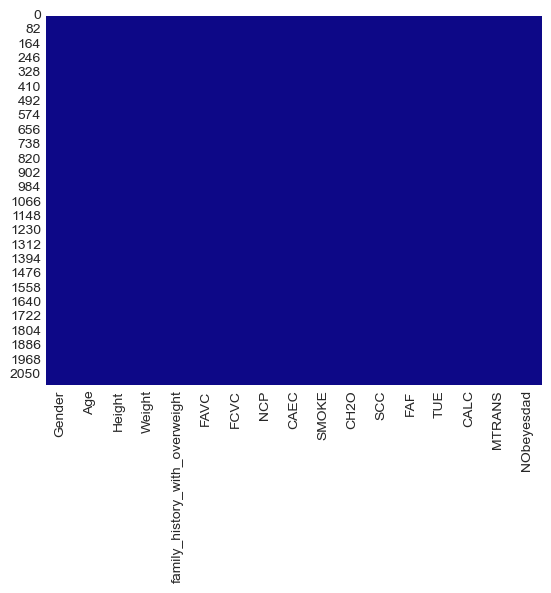

In [6]:
sns.heatmap(data.isna(), cbar=False, cmap='plasma')
plt.show()

In [7]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 24


In [9]:
data[data.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [10]:
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


### Explore features

In [11]:
numerical_features = ['Age', 'Height', 'Weight']
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
already_encoded_ordinal_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
ordinal_features_to_encode = ['CAEC', 'CALC']
nominal_features_to_encode = ["MTRANS"]
class_feature = ["NObeyesdad"]
class_names = ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']

In [12]:
data["Age"] = data["Age"].astype(int)

In [13]:
data[numerical_features].describe()

,Age,Height,Weight
count,2087.000000,2087.000000,2087.000000
mean,24.009104,1.702674,86.858730
std,6.333297,0.093186,26.190847
min,14.000000,1.450000,39.000000
25%,19.000000,1.630178,66.000000
50%,22.000000,1.701584,83.101100
75%,26.000000,1.769491,108.015907
max,61.000000,1.980000,173.000000


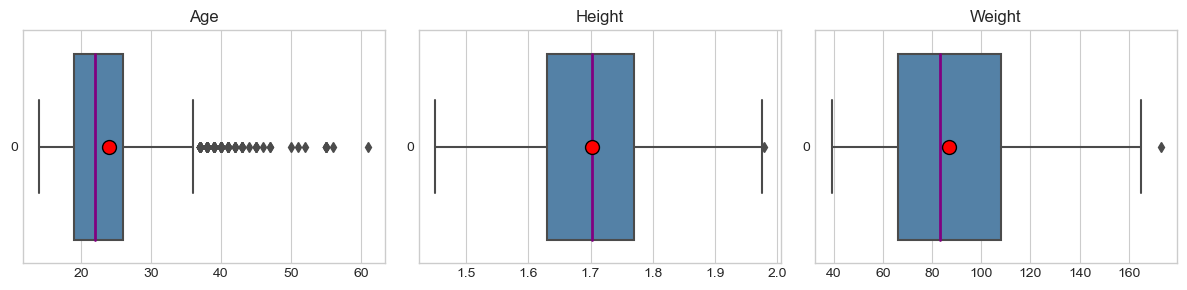

In [14]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    plt.title(feature)
    sns.boxplot(data[feature], orient='h', color="steelblue", showmeans=True,
                    medianprops={'linewidth': 2, 'color': 'purple'},
                    meanprops={"marker": "o",
                       'markerfacecolor':'red', 
                       'markeredgecolor':'black',
                       'markersize':'10'})

plt.tight_layout()

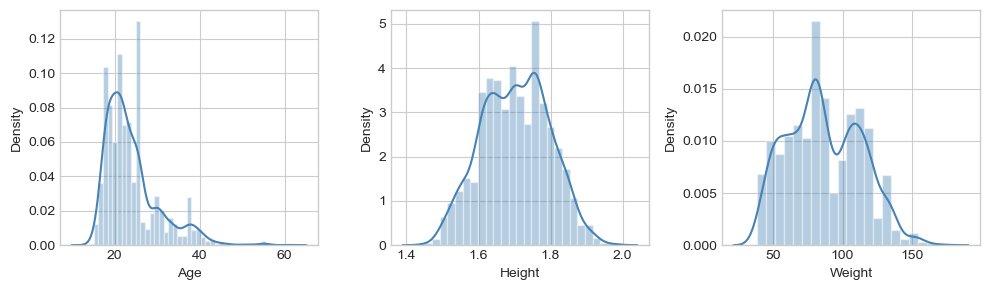

In [15]:
plt.figure(figsize=(10, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.distplot(data[feature], color="steelblue")

plt.tight_layout()

In [16]:
data[numerical_features].skew()

Age       1.547297
Height   -0.024743
Weight    0.241902
dtype: float64

In [17]:
data[numerical_features].corr()

,Age,Height,Weight
Age,1.000000,-0.036012,0.186240
Height,-0.036012,1.000000,0.457468
Weight,0.186240,0.457468,1.000000


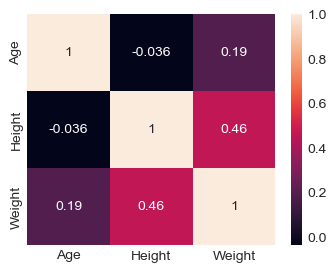

In [18]:
plt.figure(figsize=(4,3))

sns.heatmap(data[numerical_features].corr(), annot = True)

plt.show()

In [19]:
data.mode()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,21,1.7,80.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_I


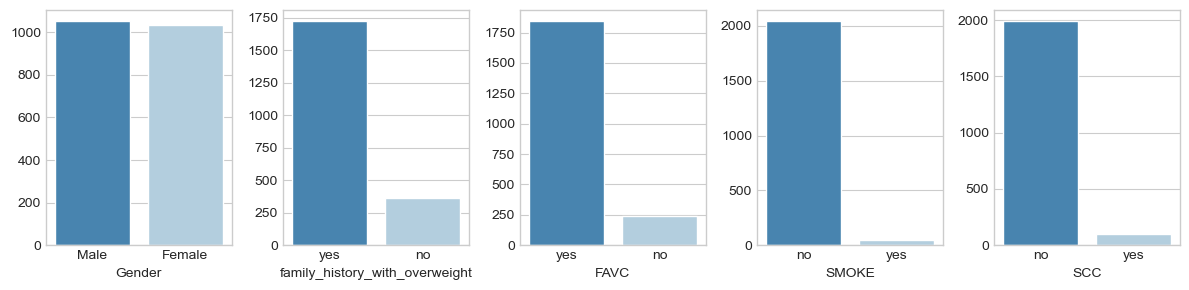

In [20]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(binary_features):
    plt.subplot(1, 5, i+1)
    counts = data[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

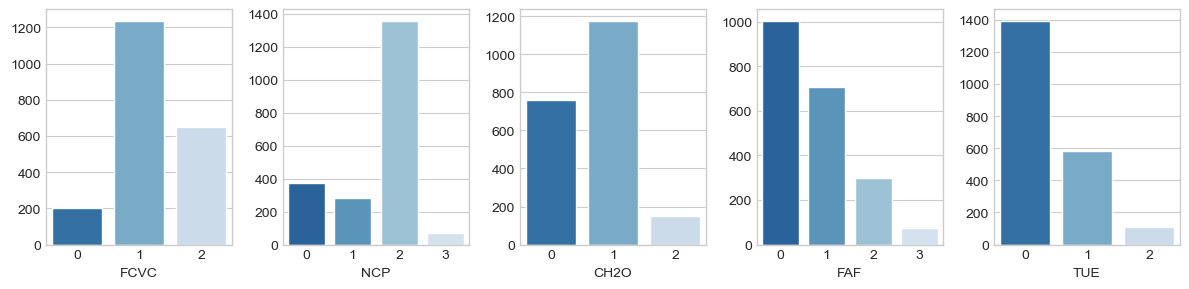

In [21]:
plt.figure(figsize=(12, 3))

for i, feature in enumerate(already_encoded_ordinal_features):
    data[feature] = data[feature].astype(int)
    min_val = min(data[feature])
    if min_val == 1: 
        data[feature] = data[feature] - 1

    plt.subplot(1, 5, i+1)
    counts = data[feature].value_counts()
    plt.xticks(counts.index)
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

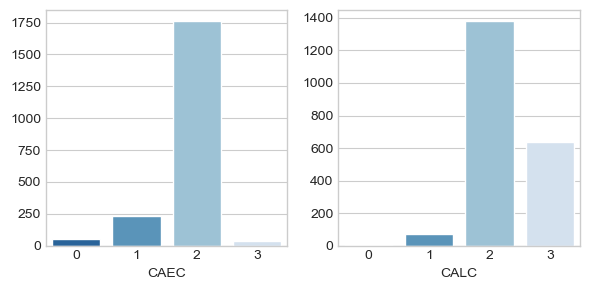

In [44]:
plt.figure(figsize=(6, 3))

for i, feature in enumerate(ordinal_features_to_encode):
    plt.subplot(1, 2, i+1)
    counts = data[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

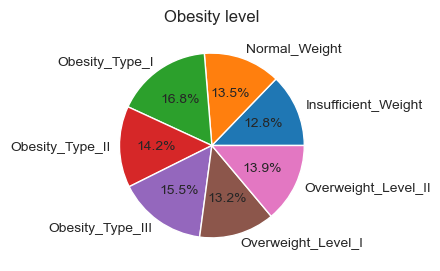

In [47]:
plt.figure(figsize=(6, 3))

plt.title("Obesity level")
data.groupby("NObeyesdad").size().plot(kind='pie', autopct='%1.1f%%')

plt.show()

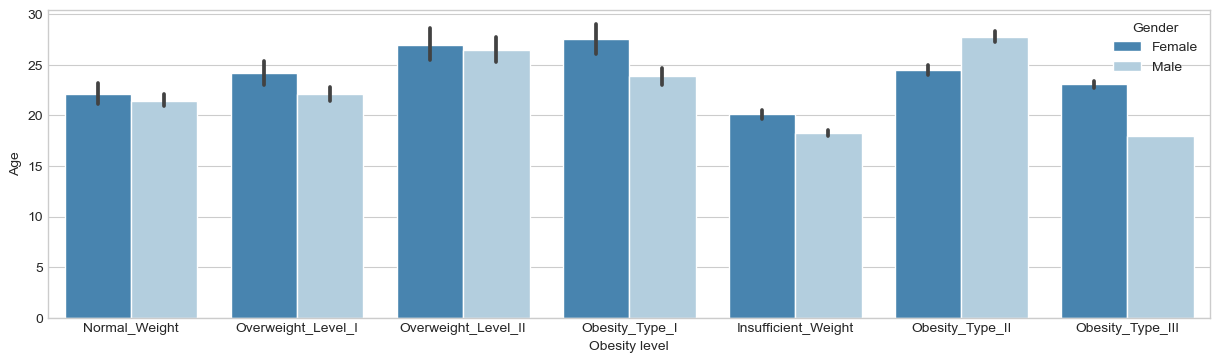

In [23]:
fig = plt.figure(figsize = (15, 4))

sns.barplot(x="NObeyesdad", y="Age", hue="Gender", data=data, palette="Blues_r")
plt.xlabel("Obesity level")
plt.ylabel("Age")

plt.show()

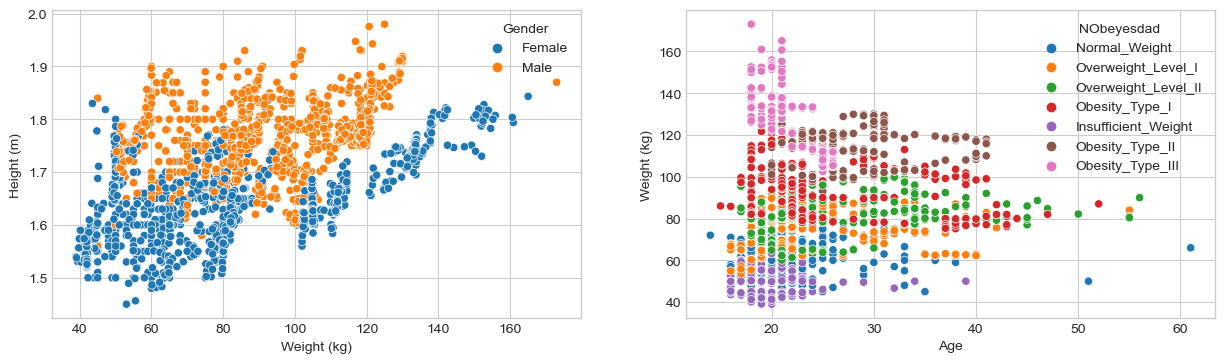

In [24]:
fig = plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Weight", y="Height", hue="Gender", data=data)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.subplot(1, 2, 2)
sns.scatterplot(x="Age", y="Weight", hue="NObeyesdad", data=data)
plt.xlabel("Age")
plt.ylabel("Weight (kg)")

plt.show()

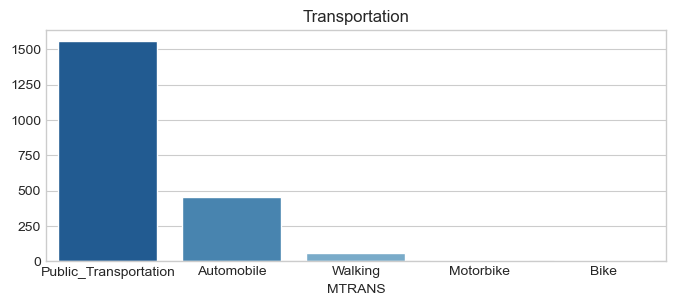

In [25]:
plt.figure(figsize=(8, 3))

plt.title("Transportation")
counts = data["MTRANS"].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.show()

### Encode features

In [26]:
enc = OrdinalEncoder()
data[ordinal_features_to_encode] = enc.fit_transform(data[ordinal_features_to_encode])
data[ordinal_features_to_encode] = data[ordinal_features_to_encode].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int32  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   int32  
 7   NCP                             2087 non-null   int32  
 8   CAEC                            2087 non-null   int32  
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   int32  
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [28]:
features_for_one_hot_encoding = binary_features + nominal_features_to_encode

ohe = OneHotEncoder(handle_unknown="ignore")

transformer = make_column_transformer((ohe, features_for_one_hot_encoding))
transformed = transformer.fit_transform(data[features_for_one_hot_encoding])
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.columns = [col.removeprefix("onehotencoder__") for col in transformed_df.columns]

data = pd.concat([data, transformed_df], axis=1)
data.drop(features_for_one_hot_encoding, axis=1, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2087 non-null   int32  
 1   Height                              2087 non-null   float64
 2   Weight                              2087 non-null   float64
 3   FCVC                                2087 non-null   int32  
 4   NCP                                 2087 non-null   int32  
 5   CAEC                                2087 non-null   int32  
 6   CH2O                                2087 non-null   int32  
 7   FAF                                 2087 non-null   int32  
 8   TUE                                 2087 non-null   int32  
 9   CALC                                2087 non-null   int32  
 10  NObeyesdad                          2087 non-null   object 
 11  Gender_Female                       2087 no

[]

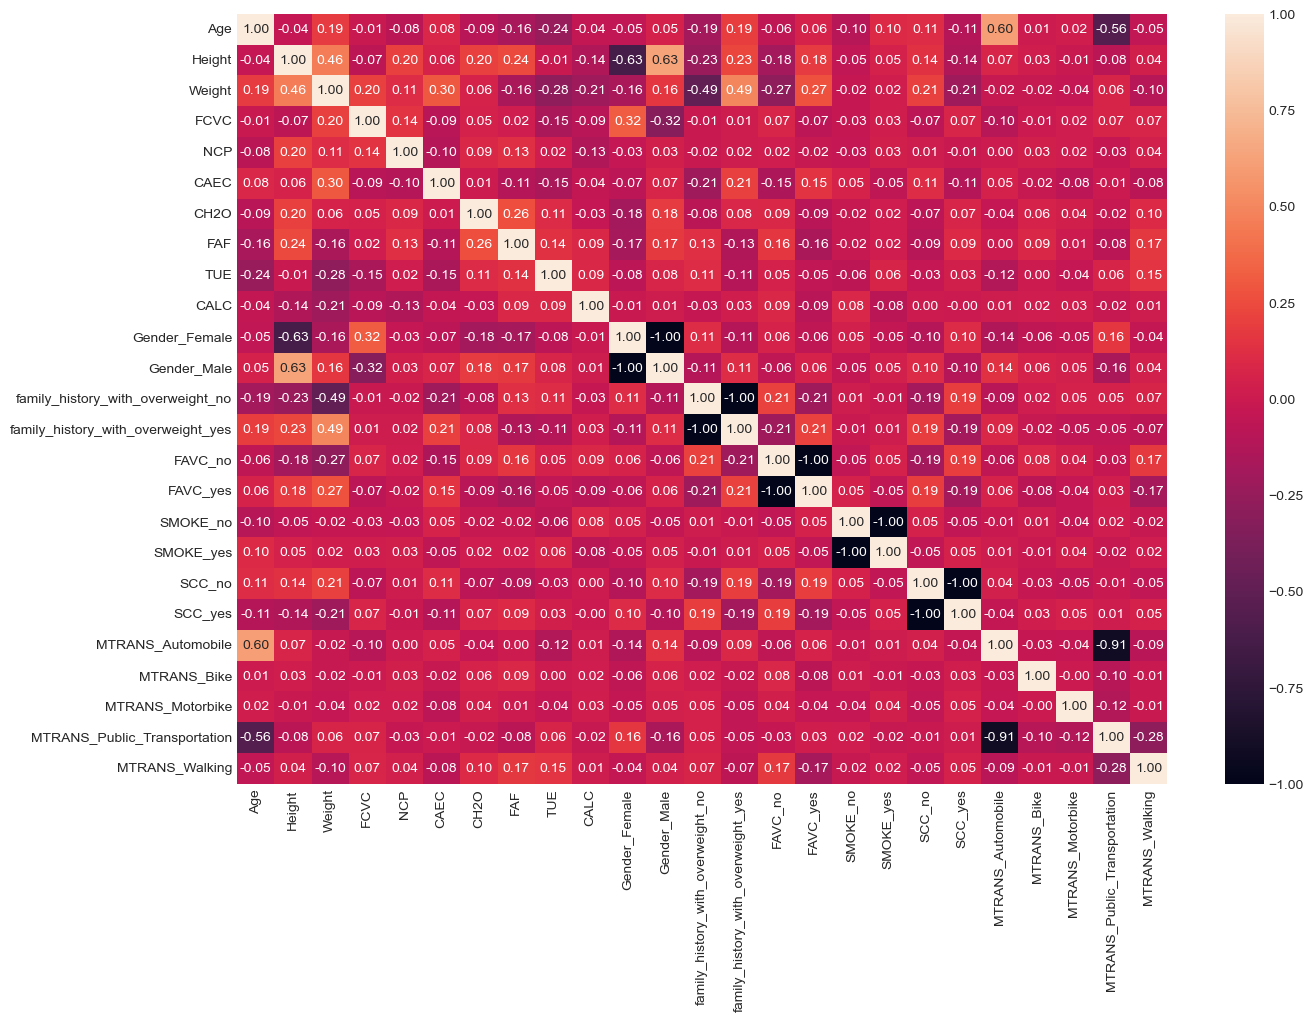

In [40]:
plt.figure(figsize=(15,10))

sns.heatmap(data.drop('NObeyesdad', axis = 1).corr(), annot = True, fmt='.2f')

plt.plot()

### Results

In [30]:
X = data.drop('NObeyesdad', axis = 1)
y = data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.2, random_state=0)

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [679]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
def roc_auc_score_multiclass(actual_class, pred_class):
    unique_class = set(actual_class)
    roc_auc_dict = {}

    for per_class in unique_class:
        other_class = [x for x in unique_class if x != per_class]

        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        roc_auc = roc_auc_score(new_actual_class, new_pred_class)
        roc_auc_dict[per_class] = roc_auc
     
        fpr, tpr, thresh = roc_curve(new_actual_class, new_pred_class) 
        plt.plot(fpr, tpr, label=per_class + ' vs Rest') 
          
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
    plt.title('ROC curve') 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive rate') 
    plt.legend(loc="lower right") 
    plt.show()

    return pd.Series(roc_auc_dict)

def evaluate_dataset(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy score: {:.2f}'.format(accuracy))

    macro_averaged_precision = precision_score(y_test, y_pred, average = 'macro')
    print('Macro-Averaged Precision score: {:.2f}'.format(macro_averaged_precision))

    micro_averaged_precision = precision_score(y_test, y_pred, average = 'micro')
    print('Micro-Averaged Precision score: {:.2f}'.format(micro_averaged_precision))

    macro_averaged_recall = recall_score(y_test, y_pred, average = 'macro')
    print('Macro-Averaged Recall score: {:.2f}'.format(macro_averaged_recall))

    micro_averaged_recall = recall_score(y_test, y_pred, average = 'micro')
    print('Micro-Averaged Recall score: {:.2f}'.format(micro_averaged_recall))

    macro_averaged_f1 = f1_score(y_test, y_pred, average = 'macro')
    print('Macro-Averaged F1 score: {:.2f}'.format(macro_averaged_f1))

    micro_averaged_f1 = f1_score(y_test, y_pred, average = 'micro')
    print('Micro-Averaged F1 score: {:.2f}'.format(micro_averaged_f1))

    print(classification_report(y_test, y_pred)) 

    # area_under_roc = roc_auc_score_multiclass(y_test, y_pred)
    # print('Area under the ROC curve: ')
    # print(area_under_roc)

    conf_matrix = confusion_matrix(y_test, y_pred) # normalize='true'
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.grid(None)
    plt.show()

##### K-Nearest Neighbors

Accuracy score: 0.85
Macro-Averaged Precision score: 0.86
Micro-Averaged Precision score: 0.85
Macro-Averaged Recall score: 0.85
Micro-Averaged Recall score: 0.85
Macro-Averaged F1 score: 0.85
Micro-Averaged F1 score: 0.85
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      1.00      0.91        53
      Normal_Weight       0.97      0.51      0.67        57
     Obesity_Type_I       0.81      0.87      0.84        70
    Obesity_Type_II       0.96      0.92      0.94        60
   Obesity_Type_III       0.94      1.00      0.97        65
 Overweight_Level_I       0.70      0.84      0.76        55
Overweight_Level_II       0.83      0.83      0.83        58

           accuracy                           0.85       418
          macro avg       0.86      0.85      0.85       418
       weighted avg       0.87      0.85      0.85       418



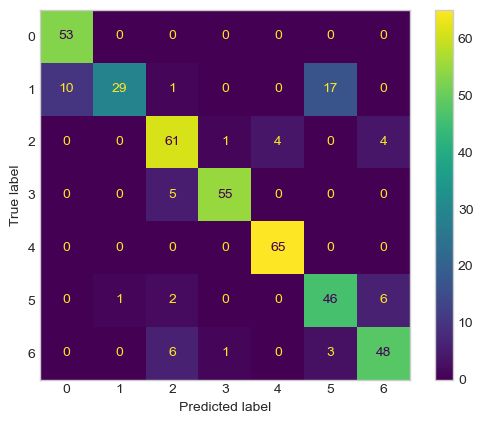

Accuracy scores:
[0.8742515  0.86826347 0.8742515  0.83832335 0.88023952 0.86826347
 0.89221557 0.8502994  0.83832335 0.88554217]
0.87 accuracy with a standard deviation of 0.02
Precision macro scores:
[0.87266665 0.86213571 0.88256149 0.83859065 0.87918377 0.87239593
 0.89166072 0.85464968 0.83082068 0.88048435]
Recall macro scores:
[0.87213976 0.86455392 0.87185303 0.83183173 0.87403202 0.86521605
 0.88774579 0.8421157  0.82830187 0.88107674]
['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro']
Recall macro scores:
[0.87213976 0.86455392 0.87185303 0.83183173 0.87403202 0.86521605
 0.88774579 0.8421157  0.82830187 0.88107674]


In [35]:
knn = KNeighborsClassifier() # weights=("uniform", "distance") -> weights="distance"
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# y_pred = knn.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print("Accuracy scores:")
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=10)
print("Precision macro scores:")
print(scores['test_precision_macro'])
print("Recall macro scores:")
print(scores['test_recall_macro'])

scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=10)
print(sorted(scores.keys()))
print("Recall macro scores:")
print(scores['test_rec_macro'])

Accuracy score: 0.77
Macro-Averaged Precision score: 0.77
Micro-Averaged Precision score: 0.77
Macro-Averaged Recall score: 0.76
Micro-Averaged Recall score: 0.77
Macro-Averaged F1 score: 0.76
Micro-Averaged F1 score: 0.77
                     precision    recall  f1-score   support

Insufficient_Weight       0.68      0.87      0.76        53
      Normal_Weight       0.68      0.40      0.51        57
     Obesity_Type_I       0.76      0.89      0.82        70
    Obesity_Type_II       0.81      0.93      0.87        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.64      0.64      0.64        55
Overweight_Level_II       0.80      0.62      0.70        58

           accuracy                           0.77       418
          macro avg       0.77      0.76      0.76       418
       weighted avg       0.77      0.77      0.76       418



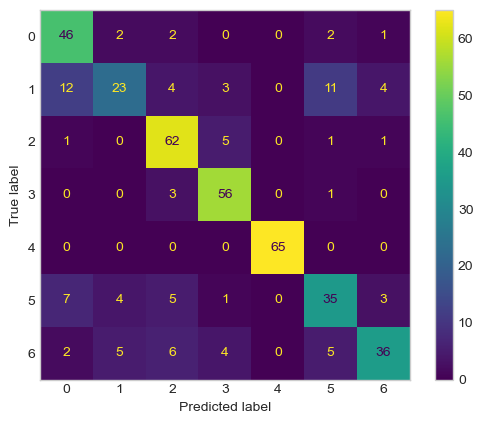

Accuracy scores:
[0.77245509 0.71257485 0.71856287 0.76646707 0.76646707 0.73652695
 0.80838323 0.73652695 0.73652695 0.77108434]
0.75 accuracy with a standard deviation of 0.03
Precision macro scores:
[0.77062887 0.70543467 0.71421023 0.76397762 0.76319117 0.72512198
 0.80166405 0.72155939 0.74354668 0.76413514]
Recall macro scores:
[0.7690048  0.70615203 0.71504229 0.76323573 0.75559611 0.73214286
 0.8053158  0.72958511 0.72847261 0.75965287]
['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro']
Recall macro scores:
[0.7690048  0.70615203 0.71504229 0.76323573 0.75559611 0.73214286
 0.8053158  0.72958511 0.72847261 0.75965287]


In [34]:
knn = KNeighborsClassifier() # weights=("uniform", "distance") -> weights="distance"
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# y_pred = knn.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)

scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("Accuracy scores:")
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(knn, X_train_scaled, y_train, scoring=scoring, cv=10)
print("Precision macro scores:")
print(scores['test_precision_macro'])
print("Recall macro scores:")
print(scores['test_recall_macro'])

scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(knn, X_train_scaled, y_train, scoring=scoring, cv=10)
print(sorted(scores.keys()))
print("Recall macro scores:")
print(scores['test_rec_macro'])

Accuracy score: 0.83
Macro-Averaged Precision score: 0.82
Micro-Averaged Precision score: 0.83
Macro-Averaged Recall score: 0.82
Micro-Averaged Recall score: 0.83
Macro-Averaged F1 score: 0.81
Micro-Averaged F1 score: 0.83
                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.89      0.83        53
      Normal_Weight       0.68      0.44      0.53        57
     Obesity_Type_I       0.85      0.91      0.88        70
    Obesity_Type_II       0.89      0.95      0.92        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.68      0.78      0.73        55
Overweight_Level_II       0.83      0.78      0.80        58

           accuracy                           0.83       418
          macro avg       0.82      0.82      0.81       418
       weighted avg       0.82      0.83      0.82       418



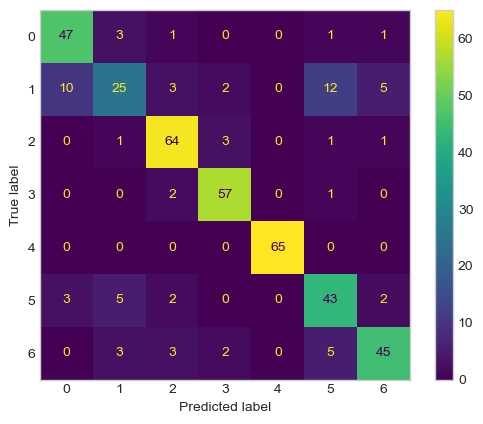

Accuracy scores:
[0.80239521 0.74251497 0.76646707 0.79640719 0.82035928 0.77844311
 0.82035928 0.79640719 0.79041916 0.81927711]
0.79 accuracy with a standard deviation of 0.02
Precision macro scores:
[0.79916398 0.73704755 0.75850902 0.77291005 0.81288099 0.76718485
 0.81039683 0.77488646 0.78247842 0.81157791]
Recall macro scores:
[0.79791637 0.73668697 0.76300857 0.79207335 0.8112581  0.77219287
 0.8163467  0.78450095 0.7841346  0.80882135]
['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro']
Recall macro scores:
[0.79791637 0.73668697 0.76300857 0.79207335 0.8112581  0.77219287
 0.8163467  0.78450095 0.7841346  0.80882135]


In [36]:
knn = KNeighborsClassifier(weights="distance") # weights=("uniform", "distance") -> weights="distance"
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# y_pred = knn.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)

scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
print("Accuracy scores:")
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(knn, X_train_scaled, y_train, scoring=scoring, cv=10)
print("Precision macro scores:")
print(scores['test_precision_macro'])
print("Recall macro scores:")
print(scores['test_recall_macro'])

scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(knn, X_train_scaled, y_train, scoring=scoring, cv=10)
print(sorted(scores.keys()))
print("Recall macro scores:")
print(scores['test_rec_macro'])

##### Decision Tree

Accuracy score: 0.93
Macro-Averaged Precision score: 0.93
Micro-Averaged Precision score: 0.93
Macro-Averaged Recall score: 0.93
Micro-Averaged Recall score: 0.93
Macro-Averaged F1 score: 0.93
Micro-Averaged F1 score: 0.93
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        53
      Normal_Weight       0.90      0.82      0.86        57
     Obesity_Type_I       0.96      0.91      0.93        70
    Obesity_Type_II       0.94      0.98      0.96        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.86      0.87      0.86        55
Overweight_Level_II       0.93      0.90      0.91        58

           accuracy                           0.93       418
          macro avg       0.93      0.93      0.93       418
       weighted avg       0.93      0.93      0.93       418



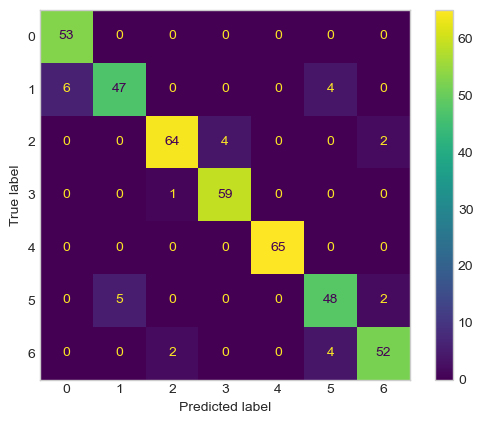

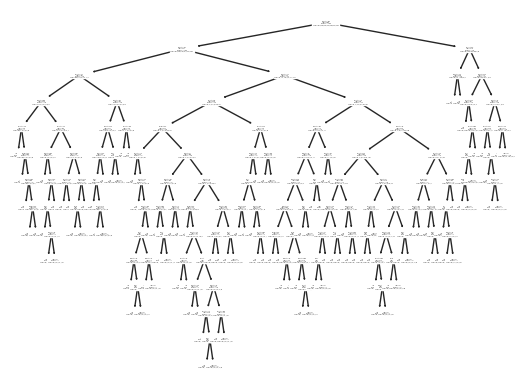

In [34]:
dec_tree = tree.DecisionTreeClassifier() # criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
dec_tree.fit(X_train_scaled, y_train)
y_pred = dec_tree.predict(X_test_scaled)

# y_pred = dec_tree.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)

tree.plot_tree(dec_tree)
plt.show()

##### Naive-Bayes

Accuracy score: 0.54
Macro-Averaged Precision score: 0.49
Micro-Averaged Precision score: 0.54
Macro-Averaged Recall score: 0.53
Micro-Averaged Recall score: 0.54
Macro-Averaged F1 score: 0.45
Micro-Averaged F1 score: 0.54
                     precision    recall  f1-score   support

Insufficient_Weight       0.44      1.00      0.61        53
      Normal_Weight       0.64      0.12      0.21        57
     Obesity_Type_I       0.42      0.49      0.45        70
    Obesity_Type_II       0.49      1.00      0.66        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.00      0.00      0.00        55
Overweight_Level_II       0.47      0.14      0.21        58

           accuracy                           0.54       418
          macro avg       0.49      0.53      0.45       418
       weighted avg       0.50      0.54      0.46       418



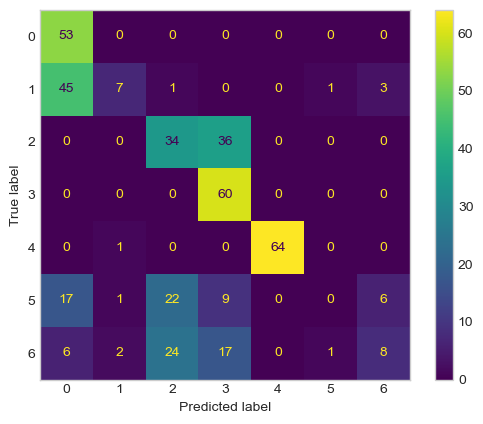

In [35]:
n_bayes = GaussianNB() 
n_bayes.fit(X_train_scaled, y_train)
y_pred = n_bayes.predict(X_test_scaled)

# y_pred = n_bayes.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)

##### Random Forest

Accuracy score: 0.95
Macro-Averaged Precision score: 0.95
Micro-Averaged Precision score: 0.95
Macro-Averaged Recall score: 0.95
Micro-Averaged Recall score: 0.95
Macro-Averaged F1 score: 0.95
Micro-Averaged F1 score: 0.95
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.98      0.96        53
      Normal_Weight       0.86      0.89      0.88        57
     Obesity_Type_I       1.00      0.94      0.97        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.91      0.89      0.90        55
Overweight_Level_II       0.98      0.97      0.97        58

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.96      0.95      0.95       418



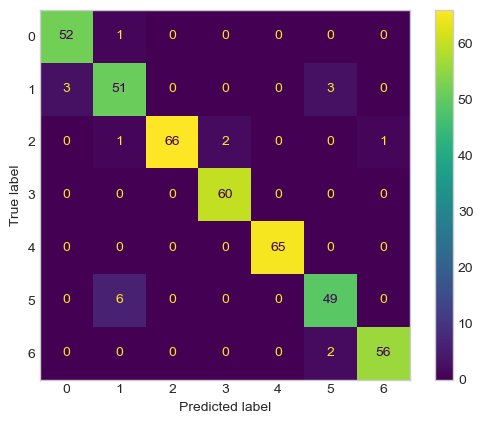

In [36]:
rnd_forest = RandomForestClassifier() # n_estimators=10 (default=100), criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
rnd_forest.fit(X_train_scaled, y_train)
y_pred = rnd_forest.predict(X_test_scaled)

# y_pred = rnd_forest.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)

##### Gradient Boosting

Accuracy score: 0.97
Macro-Averaged Precision score: 0.97
Micro-Averaged Precision score: 0.97
Macro-Averaged Recall score: 0.97
Micro-Averaged Recall score: 0.97
Macro-Averaged F1 score: 0.97
Micro-Averaged F1 score: 0.97
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        53
      Normal_Weight       1.00      0.93      0.96        57
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       0.95      1.00      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.93      0.95      0.94        55
Overweight_Level_II       0.93      0.95      0.94        58

           accuracy                           0.97       418
          macro avg       0.97      0.97      0.97       418
       weighted avg       0.97      0.97      0.97       418



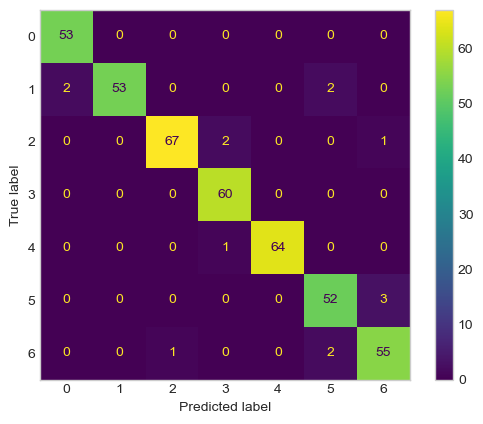

In [37]:
gr_boosting = GradientBoostingClassifier() 
gr_boosting.fit(X_train_scaled, y_train)
y_pred = gr_boosting.predict(X_test_scaled)

# y_pred = gr_boosting.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)

##### SVM

Accuracy score: 0.79
Macro-Averaged Precision score: 0.78
Micro-Averaged Precision score: 0.79
Macro-Averaged Recall score: 0.78
Micro-Averaged Recall score: 0.79
Macro-Averaged F1 score: 0.78
Micro-Averaged F1 score: 0.79
                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.89      0.82        53
      Normal_Weight       0.70      0.67      0.68        57
     Obesity_Type_I       0.76      0.80      0.78        70
    Obesity_Type_II       0.82      0.98      0.89        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.69      0.62      0.65        55
Overweight_Level_II       0.73      0.55      0.63        58

           accuracy                           0.79       418
          macro avg       0.78      0.78      0.78       418
       weighted avg       0.79      0.79      0.78       418



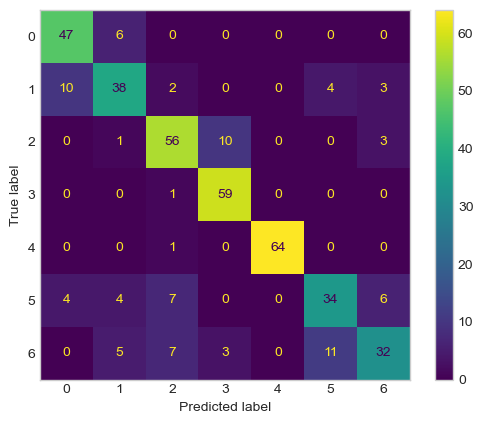

In [38]:
svm = SVC() 
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# y_pred = svm.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)

##### Logistic Regression

Accuracy score: 0.73
Macro-Averaged Precision score: 0.72
Micro-Averaged Precision score: 0.73
Macro-Averaged Recall score: 0.73
Micro-Averaged Recall score: 0.73
Macro-Averaged F1 score: 0.72
Micro-Averaged F1 score: 0.73
                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.98      0.87        53
      Normal_Weight       0.72      0.49      0.58        57
     Obesity_Type_I       0.70      0.69      0.69        70
    Obesity_Type_II       0.68      0.97      0.80        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.63      0.56      0.60        55
Overweight_Level_II       0.57      0.43      0.49        58

           accuracy                           0.73       418
          macro avg       0.72      0.73      0.72       418
       weighted avg       0.73      0.73      0.72       418



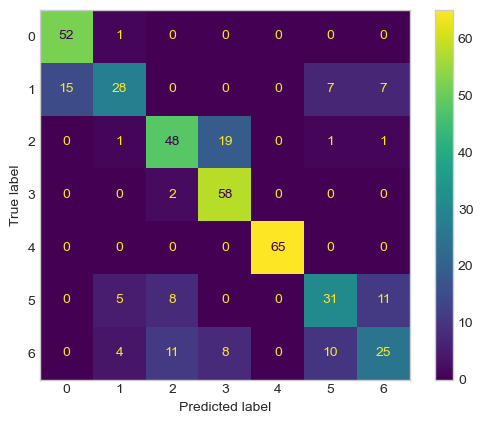

In [39]:
log_regression = LogisticRegression() 
log_regression.fit(X_train_scaled, y_train)
y_pred = log_regression.predict(X_test_scaled)

# y_pred = log_regression.predict(X_train_scaled)
# accuracy = accuracy_score(y_train, y_pred)
# print('Accuracy on training set: {:.2f}'.format(accuracy))

evaluate_dataset(y_pred, y_test)